# MODELING OF STRENGTH OF HIGH-PERFORMANCE CONCRETE USING *ARTIFICIAL NEURAL NETWORKS*

In [1]:
# import Data Manipulation library
import pandas as pd
import numpy as np

#Import Data visualizatio library
import matplotlib.pyplot as plt
import seaborn as sns

#Import filter warning library
import warnings
warnings.filterwarnings('ignore')

#Import scikit Learn library
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FunctionTransformer

import scipy.stats as stats

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import set_config
set_config(display='diagram')

# import Deep Learning Library
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
# import keras_tuner as kt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model



# Concrete Compressive Strength Dataset
## Overview
- **Source**: [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength)
- **Dataset Type**: Regression
- **Number of Instances**: 1030
- **Number of Attributes**: 9 input variables + 1 target variable
- **Domain**: Civil Engineering, Material Science
- **Objective**: Predict the compressive strength of concrete based on its composition and age.

## Attribute Information
| Column | Description | Unit |
|---------|------------------------------|--------------|
| Cement | Cement component | kg/m³ |
| Blast Furnace Slag | Blast furnace slag component | kg/m³ |
| Fly Ash | Fly ash component | kg/m³ |
| Water | Water component | kg/m³ |
| Superplasticizer | Superplasticizer additive | kg/m³ |
| Coarse Aggregate | Coarse aggregate component | kg/m³ |
| Fine Aggregate | Fine aggregate component | kg/m³ |
| Age | Age of concrete samples | Days |
| Compressive Strength | Target variable - Strength of concrete | MPa |

## Dataset Characteristics
- The dataset contains **continuous numerical features**.
- The target variable (compressive strength) is influenced by **composition and age**.
- No categorical features.

## Applications
- Predicting the strength of concrete for **construction quality control**.
- Understanding the impact of different components on **material durability**.
- Optimizing concrete composition for **stronger and cost-effective construction**.

## Source & Citation
Yeh, I-C. "Modeling of Strength of High-Performance Concrete Using Artificial Neural Networks." *Cement and Concrete Research*, Vol. 28, No. 12, pp. 1797-1808, 1998.

---

In [2]:
# Import Dataset Using Pandas Function

url = 'https://raw.githubusercontent.com/jadhavgaurav/cement-composite-strength-prediction/refs/heads/main/concrete_data.csv'

df = pd.read_csv(url)
df.sample(frac = 1) # Shuffle Dataset

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
308,277.1,0.0,97.4,160.6,11.8,973.9,875.6,100,55.64
595,186.2,124.1,0.0,185.7,0.0,1083.4,764.3,28,17.60
248,238.1,0.0,94.1,186.7,7.0,949.9,847.0,100,44.30
137,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
585,290.2,193.5,0.0,185.7,0.0,998.2,704.3,28,33.04
...,...,...,...,...,...,...,...,...,...
222,166.1,0.0,163.3,176.5,4.5,1058.6,780.1,56,28.63
673,212.0,141.3,0.0,203.5,0.0,973.4,750.0,7,15.03
636,300.0,0.0,0.0,184.0,0.0,1075.0,795.0,28,26.85
96,425.0,106.3,0.0,151.4,18.6,936.0,803.7,7,46.80


In [3]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [4]:
df.columns = df.columns.str.strip()

In [5]:
# Checking Data information and Missing Values if any...

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


There are 8 Features and 1 Target Column. No null values found in the data

In [6]:
# Checking Descriptive Stattistics
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
# Univariate Analysis (Custom Function)

from collections import OrderedDict

stats = []
for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature': i,
        'Maximum' : df[i].max(),
        'Minimum' : df[i].min(),
        'Mean' : df[i].mean(),
        'Median' : df[i].median(),
        '25%': df[i].quantile(0.25),
        '75%': df[i].quantile(0.75),
        'Standard Deviation': df[i].std(),
        'Variance': df[i].var(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurt(),
        'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25)
    })
    stats.append(numerical_stats)
report = pd.DataFrame(stats)
report

,Feature,Maximum,Minimum,Mean,Median,25%,75%,Standard Deviation,Variance,Skewness,Kurtosis,IQR
0,cement,540.0,102.00,281.167864,272.900,192.375,350.000,104.506364,10921.580220,0.509481,-0.520652,157.625
1,blast_furnace_slag,359.4,0.00,73.895825,22.000,0.000,142.950,86.279342,7444.124812,0.800717,-0.508175,142.950
2,fly_ash,200.1,0.00,54.188350,0.000,0.000,118.300,63.997004,4095.616541,0.537354,-1.328746,118.300
3,water,247.0,121.80,181.567282,185.000,164.900,192.000,21.354219,456.002651,0.074628,0.122082,27.100
4,superplasticizer,32.2,0.00,6.204660,6.400,0.000,10.200,5.973841,35.686781,0.907203,1.411269,10.200
5,coarse_aggregate,1145.0,801.00,972.918932,968.000,932.000,1029.400,77.753954,6045.677357,-0.040220,-0.599016,97.400
6,fine_aggregate,992.6,594.00,773.580485,779.500,730.950,824.000,80.175980,6428.187792,-0.253010,-0.102177,93.050
7,age,365.0,1.00,45.662136,28.000,7.000,56.000,63.169912,3990.437729,3.269177,12.168989,49.000
8,concrete_compressive_strength,82.6,2.33,35.817961,34.445,23.710,46.135,16.705742,279.081814,0.416977,-0.313725,22.425


## Based on above information, we find that the dataset is non normal distributed

## Univariate Analysis
### **1. Histograms & KDE Plots**

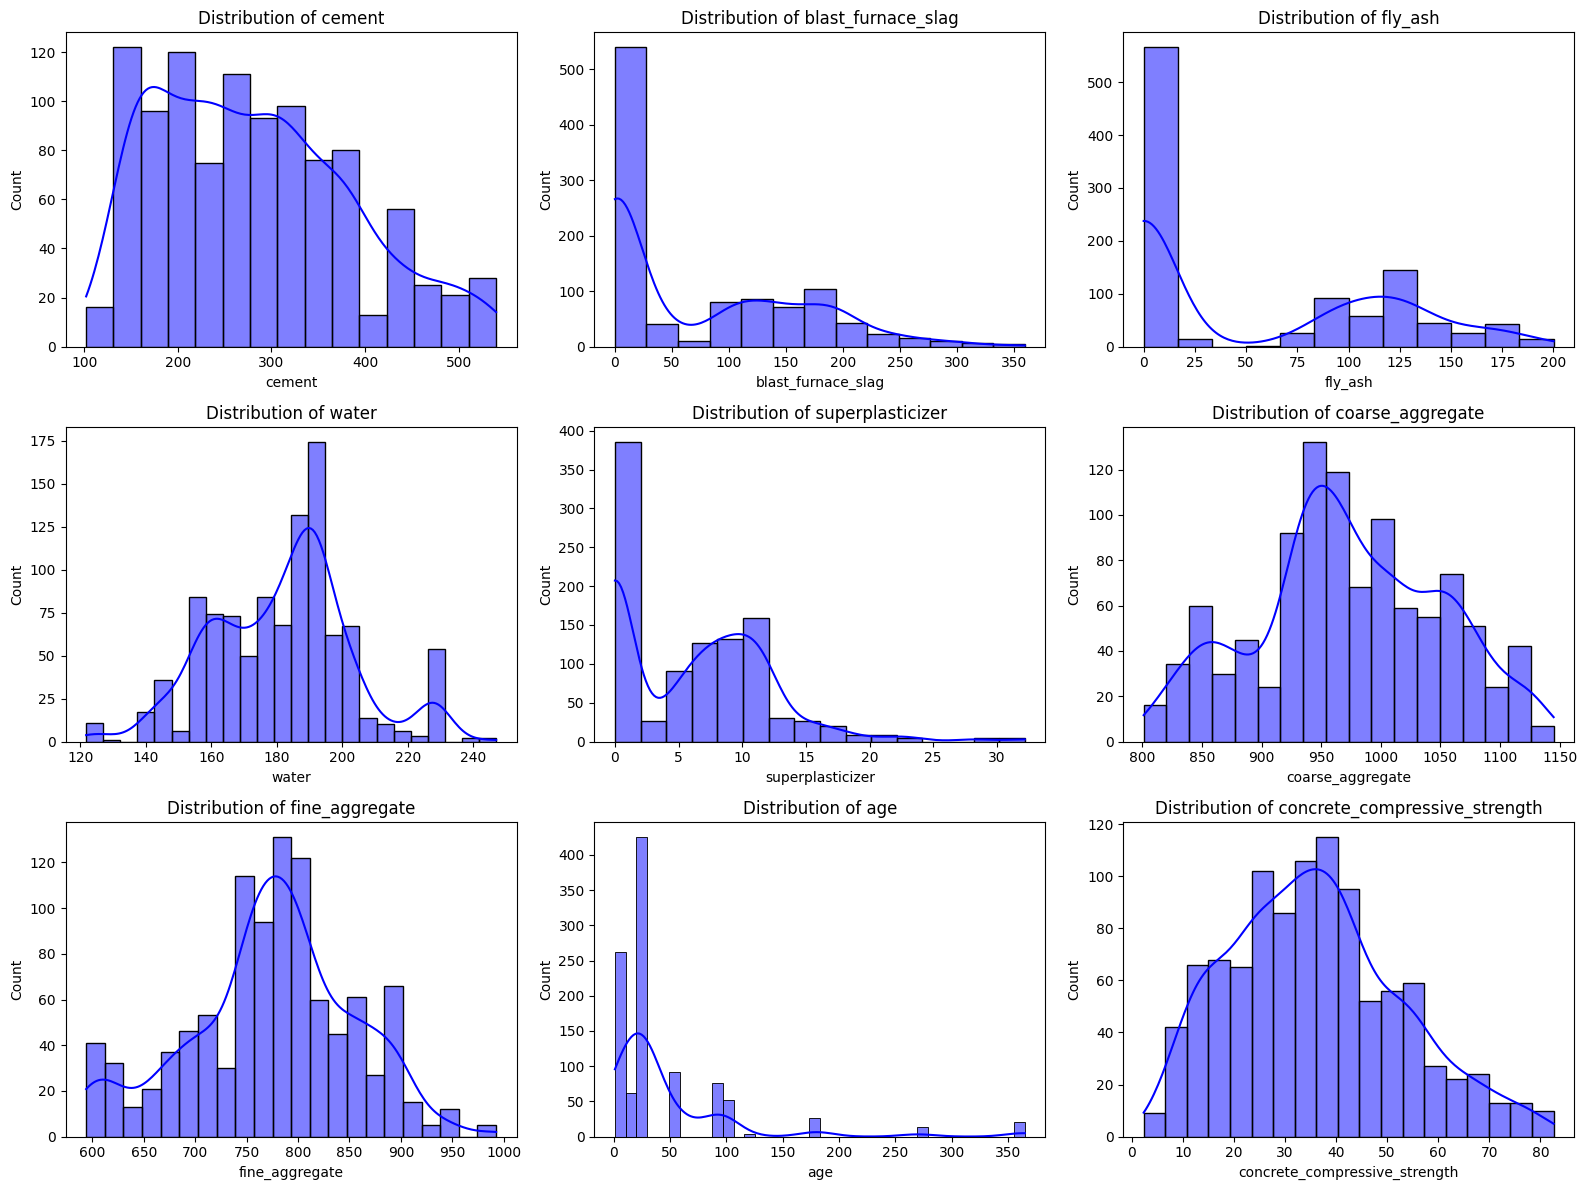

In [8]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

- Cement, water, and aggregates follow near-normal distributions, meaning these - materials have consistent usage across different mixes.
- Blast furnace slag, fly ash, and superplasticizer are highly skewed, indicating - they are often absent or used in small amounts.
- Age distribution suggests that most concrete samples are tested at an early - stage, while long-term strength is measured less frequently.
- The strength distribution shows that most concrete samples achieve 30-50 MPa - compressive strength, which is a standard range for construction applications.

### **2. Box Plots for Outlier Detection**


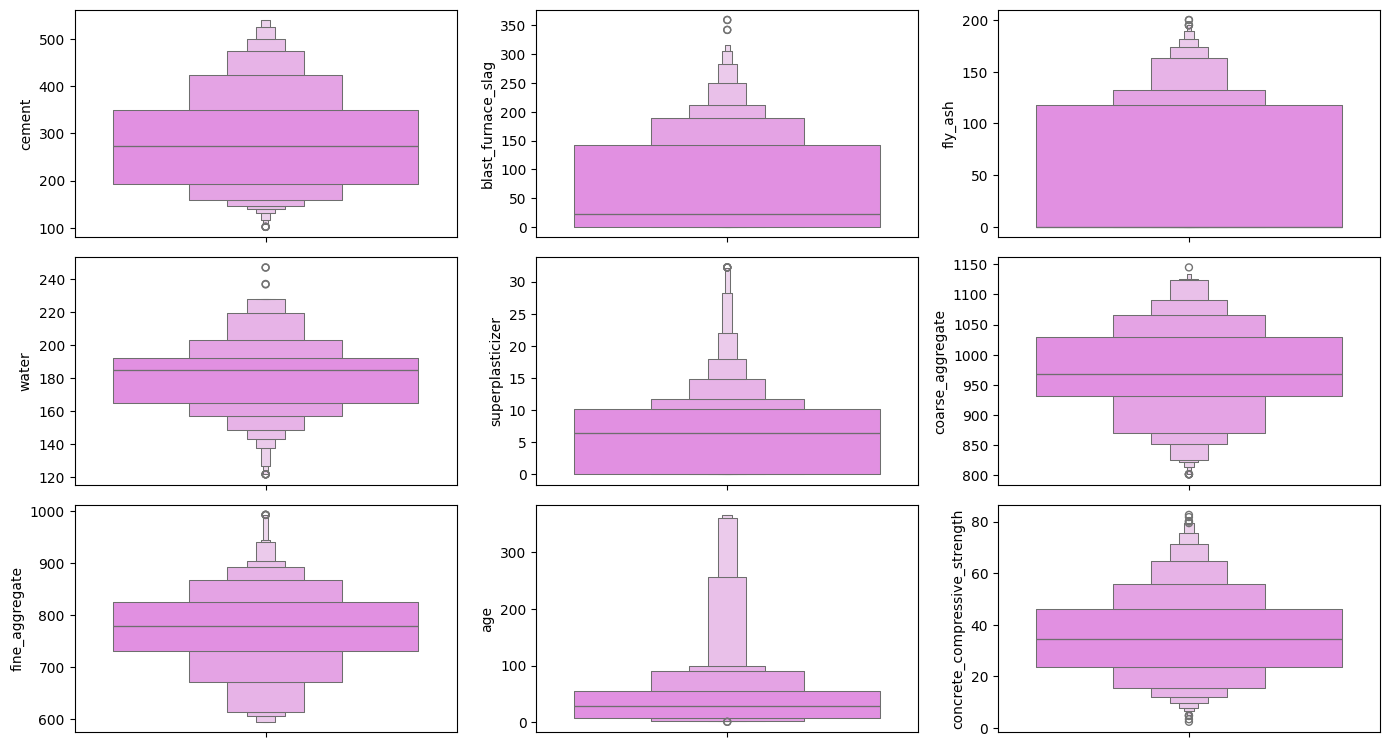

In [9]:

# Boxplot for detecting outliers in the dataset
plt.figure(figsize=(14, 10))
plot = 0
for i in df.columns:
    plot += 1
    plt.subplot(4, 3, plot)
    sns.boxenplot(df[i], color='violet')
    plt.tight_layout()
plt.show()


# Bivariate Analysis
###    **4.1. Correlation Matrix**

In [10]:
df.corr()['concrete_compressive_strength']

,concrete_compressive_strength
cement,0.497832
blast_furnace_slag,0.134829
fly_ash,-0.105755
water,-0.289633
superplasticizer,0.366079
coarse_aggregate,-0.164935
fine_aggregate,-0.167241
age,0.328873
concrete_compressive_strength,1.000000


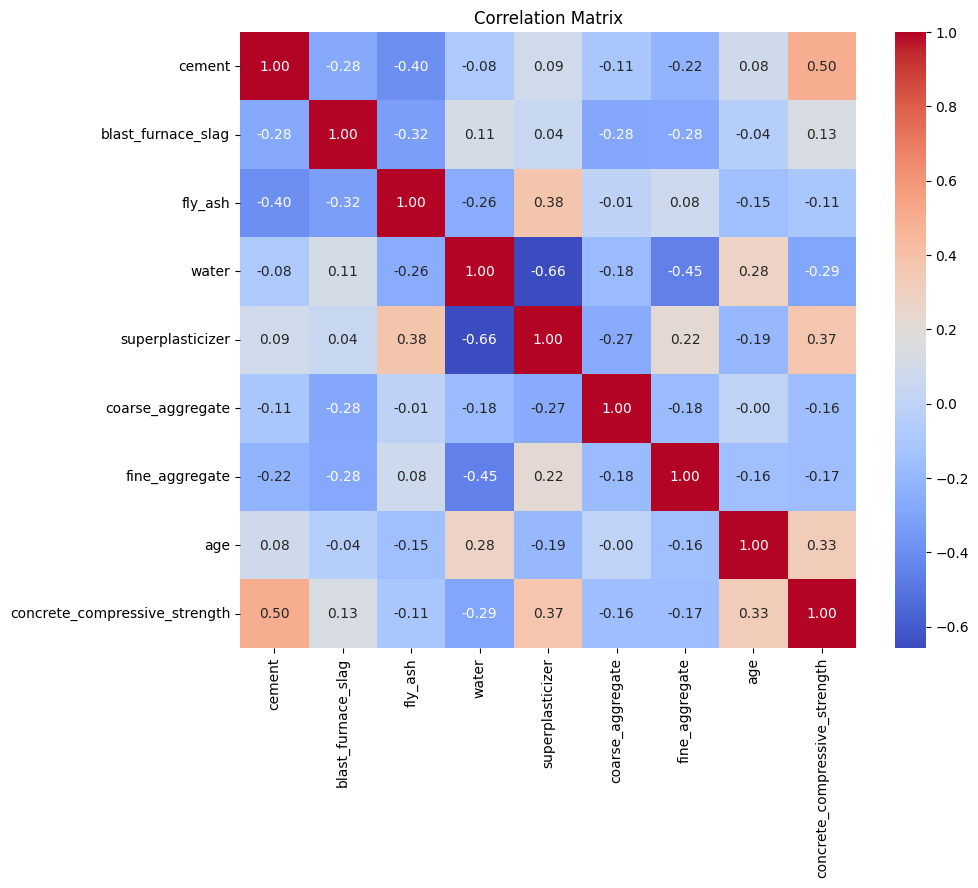

In [11]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

1️⃣ Cement is the most critical factor (+0.50 correlation) – Higher cement content significantly increases concrete compressive strength.

2️⃣ Superplasticizer improves strength (+0.37 correlation) – It enhances workability while reducing water, leading to stronger concrete.

3️⃣ Age matters (+0.33 correlation) – As concrete cures over time, its strength increases.

4️⃣ Water negatively affects strength (-0.29 correlation) – Excess water weakens concrete, reducing durability.

5️⃣ Aggregates (fine & coarse) have minimal direct impact (~-0.16 correlation) – While essential for structure, their contribution to compressive strength is not significant.

6️⃣ Fly ash and blast furnace slag have weak correlations (~0.13 to -0.11) – These materials don’t drastically impact strength but may influence durability and workability.

7️⃣ Water and superplasticizer are strongly negatively correlated (-0.66) – More superplasticizer means less water is needed, leading to better strength.

### **2. Pair Plot**

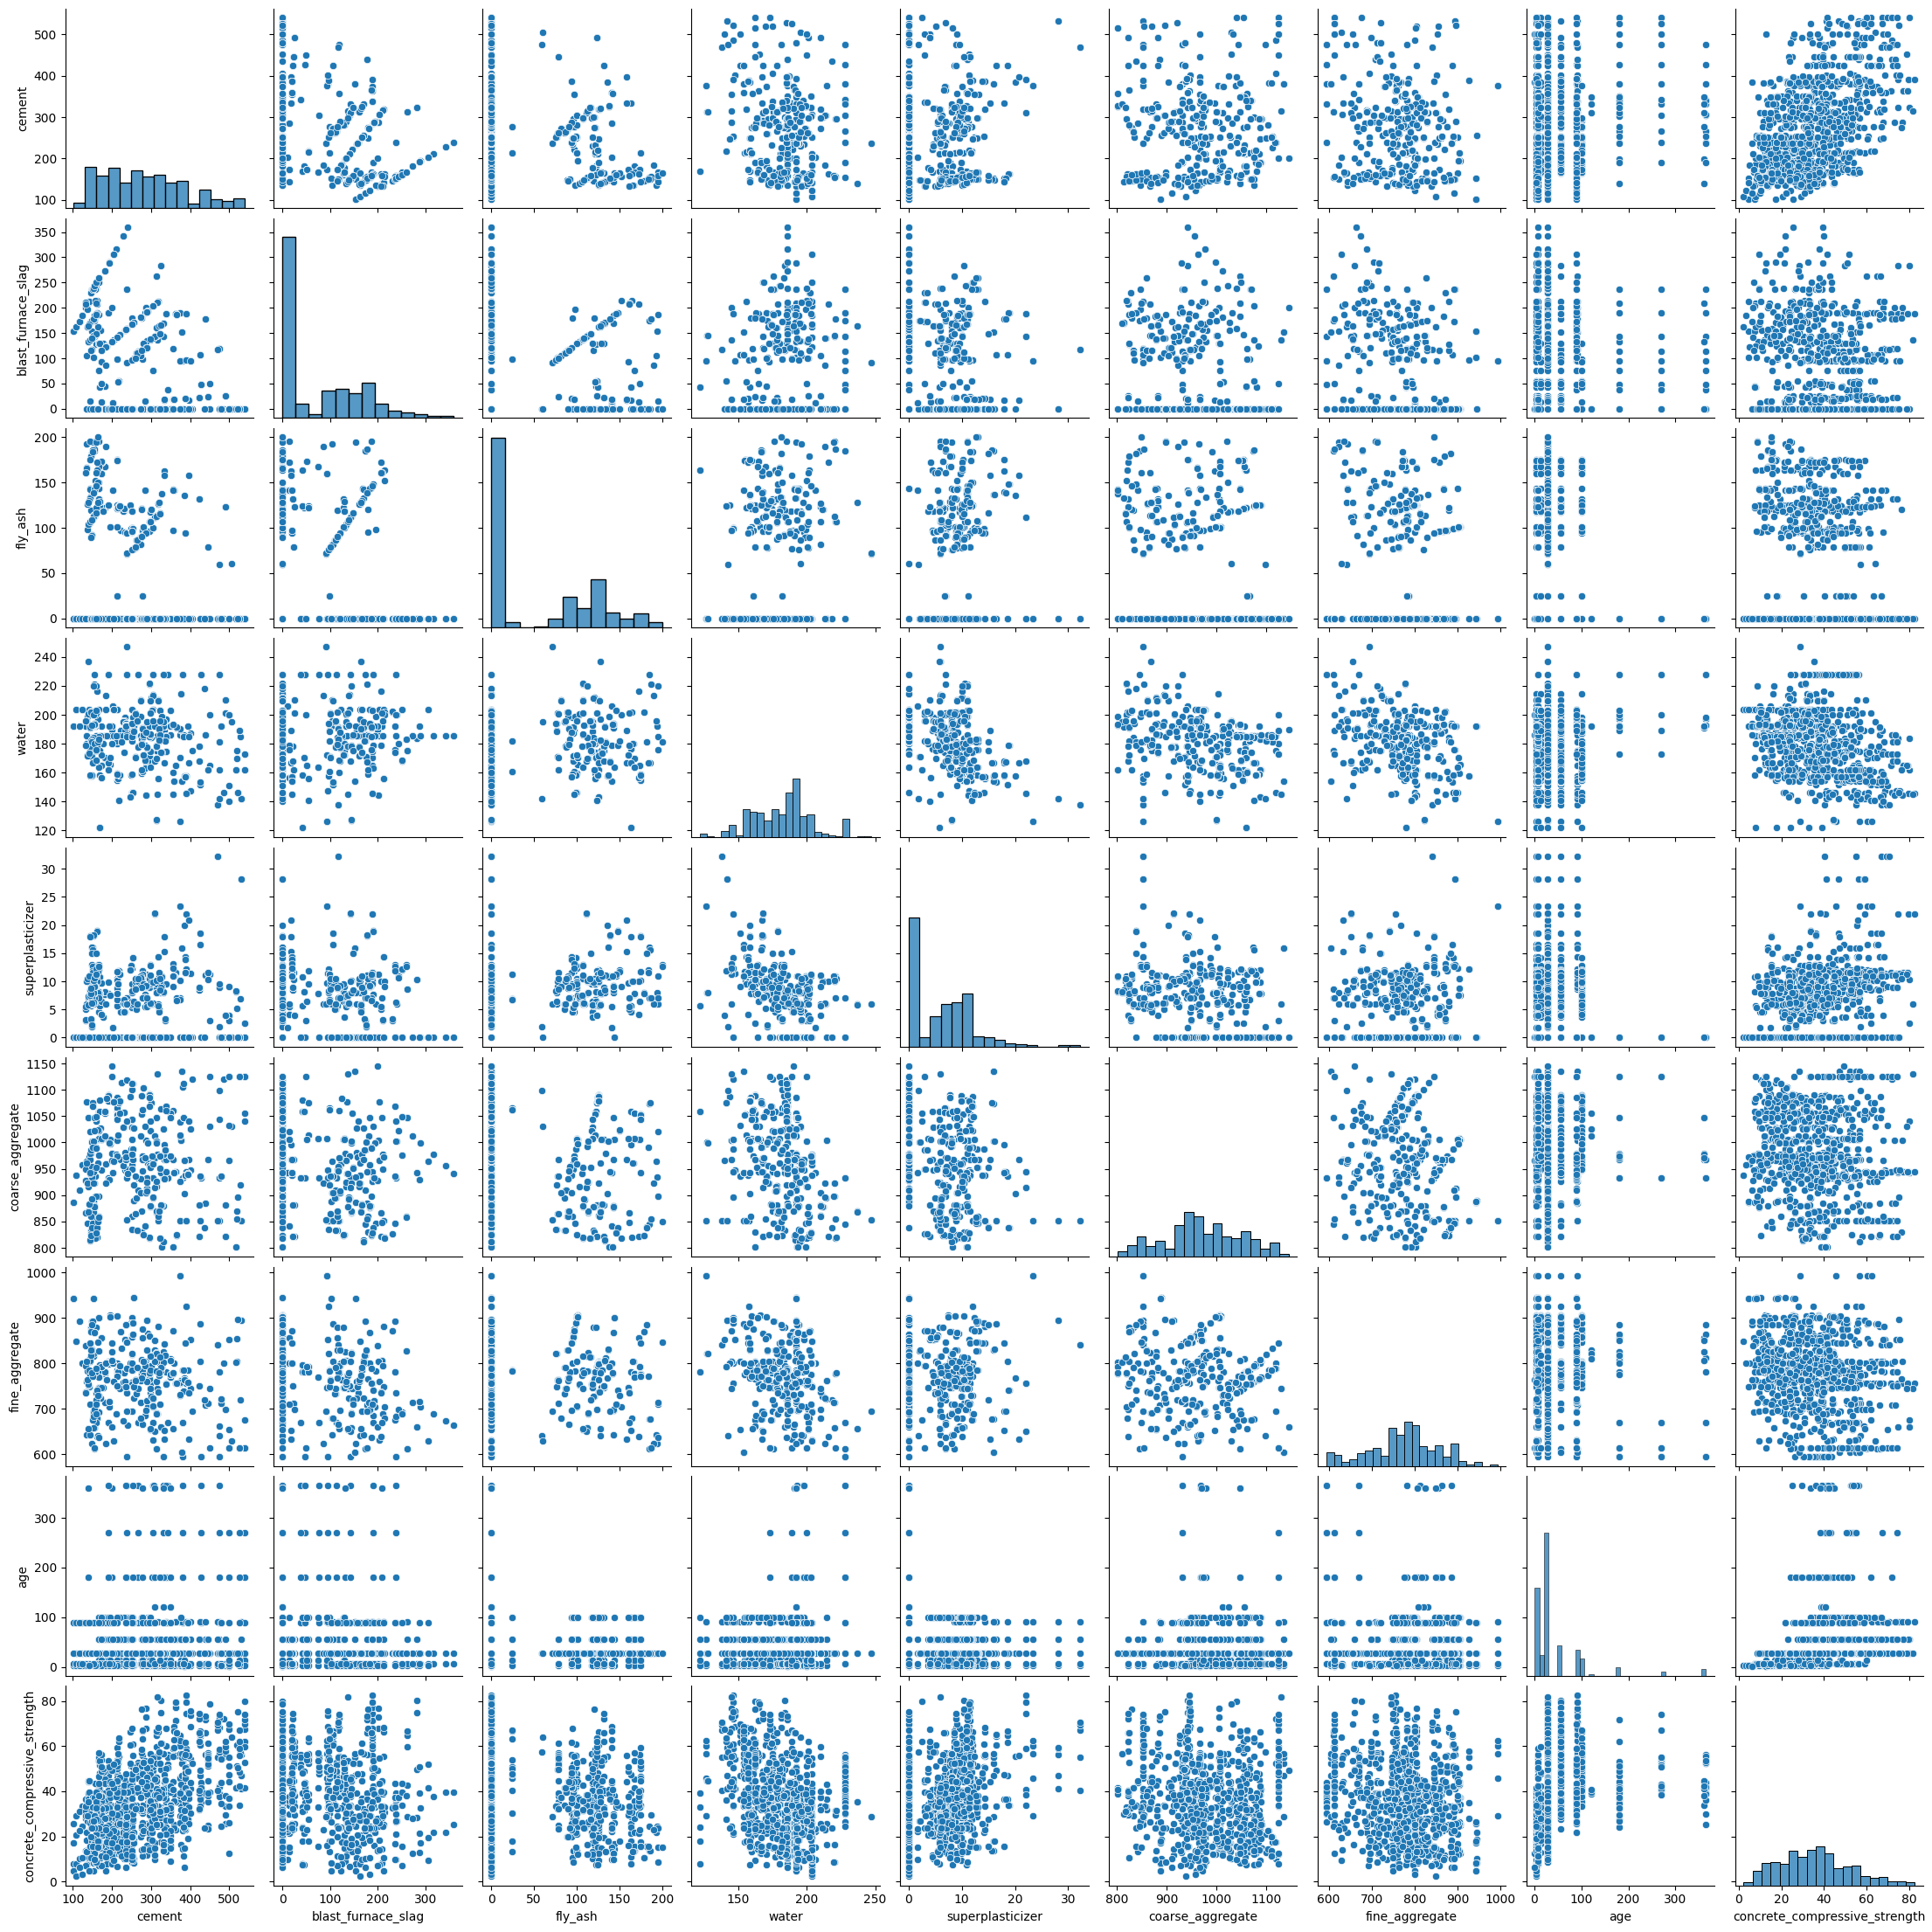

In [12]:
sns.pairplot(df, diag_kind='auto')
plt.show()


1️⃣ **Strong Positive Correlation:** <br>
Cement vs. Compressive Strength → As cement content increases, strength significantly improves. <br>
Age vs. Compressive Strength → Older concrete has higher strength due to curing effects.<br>

2️⃣ **Negative Correlation:** <br>
Water vs. Compressive Strength → Higher water content weakens concrete, leading to lower strength. <br>
Water vs. Superplasticizer → More superplasticizer reduces water requirement, improving workability.<br>

3️⃣ **Weak or No Significant Trends:** <br>
Coarse & Fine Aggregate vs. Compressive Strength → No clear impact; aggregates provide structure but don’t directly boost strength. <br>
Fly Ash & Blast Furnace Slag vs. Strength → Some contribution but not a strong determinant.<br>

4️⃣ **Distribution Insights:** <br>
Some variables (like water and superplasticizer) have skewed distributions, indicating possible outliers or non-uniform data distribution. <br>
Compressive strength has a right-skewed distribution, meaning most values are lower, with fewer high-strength samples.

- Maximize cement & curing time for better strength.
- Reduce water & optimize superplasticizer for better workability and durability.
- Reevaluate the role of aggregates in mix design.

## Multivariate Analysis / Deeper Outlier Inspection
### 1. **3D AXES PLOT** Using a combination of features
### For instance, we could see if certain features combined


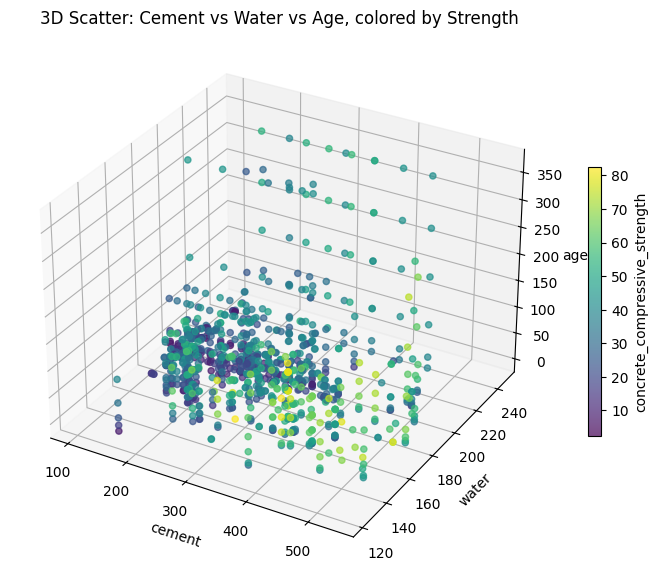

In [13]:
from mpl_toolkits.mplot3d import Axes3D
target_col = 'concrete_compressive_strength'

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Choose three features for demonstration
x_feat = 'cement'
y_feat = 'water'
z_feat = 'age'

scatter = ax.scatter(df[x_feat],
                     df[y_feat],
                     df[z_feat],
                     c=df[target_col],
                     cmap='viridis',
                     alpha=0.7)

ax.set_xlabel(x_feat)
ax.set_ylabel(y_feat)
ax.set_zlabel(z_feat)
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5)
cbar.set_label(target_col)
plt.title("3D Scatter: Cement vs Water vs Age, colored by Strength")
plt.show()


1️⃣ Higher Cement = Higher Strength → More cement content generally results in stronger concrete. <br>
2️⃣ Higher Age = Higher Strength → Older concrete (higher curing time) shows greater compressive strength. <br>
3️⃣ Higher Water = Lower Strength → Excess water reduces strength, confirming the water-to-cement ratio's impact.

📌 Conclusions for Optimization:

- Increase cement while keeping water in check for higher strength.
- Allow longer curing time to enhance strength.
- Balance water-to-cement ratio to prevent strength reduction.

In [14]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age',
       'concrete_compressive_strength'],
      dtype='object')

# Feature Engineering

In [15]:
# 1. Water-to-Cement Ratio (w/c Ratio)
# The ratio of water to cement significantly influences concrete strength.

df['water_cement_ratio'] = df['water'] / df['cement']

In [ ]:
# 2. Concrete gains strength over time.
# This ratio helps normalize strength based on curing duration

df['strength_age_ratio'] = df['concrete_compressive_strength'] / df['age']

In [17]:
new_features = ['water_cement_ratio', 'strength_age_ratio']

## Variance Inflation Factor

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  # Importing statsmodels

X = df.drop(columns='concrete_compressive_strength')  # Selecting only independent variables

# Add a small constant to avoid division errors
X = X + 1e-10

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)

              Feature         VIF
0              cement   48.913538
1  blast_furnace_slag    3.806776
2             fly_ash    4.239282
3               water  142.026838
4    superplasticizer    5.474348
5    coarse_aggregate   85.722070
6      fine_aggregate   79.466419
7                 age    2.044657
8  water_cement_ratio   45.564599
9  strength_age_ratio    2.700167


### We will drop the features with High VIF(variance-inflation-factor) as they impact model performance

In [19]:
df.drop(columns=['water', 'coarse_aggregate', 'fine_aggregate'], inplace=True)

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm  # Importing statsmodels

X = df.drop(columns='concrete_compressive_strength')  # Selecting only independent variables

# Add a small constant to avoid division errors
X = X + 1e-10

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)

              Feature       VIF
0              cement  5.485113
1  blast_furnace_slag  3.190417
2             fly_ash  3.723656
3    superplasticizer  3.376431
4                 age  1.975182
5  water_cement_ratio  6.661283
6  strength_age_ratio  2.661419


VIF for all the features is less than 10, So the features will lead to good model performance

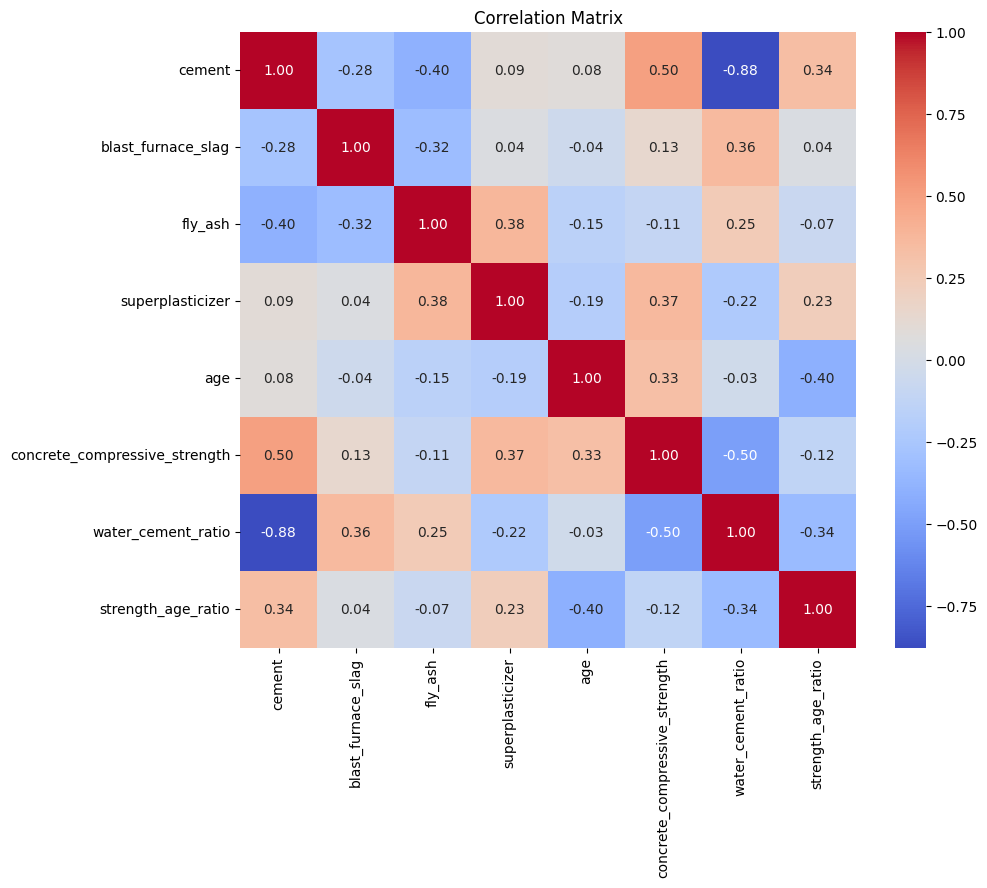

In [21]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

*Correlation Analysis:*
- **Strong Positive Correlations:**

- Cement vs. Concrete Compressive Strength (0.50): More cement leads to stronger concrete.
- Superplasticizer vs. Concrete Compressive Strength (0.37): Superplasticizers improve concrete strength.
- Age vs. Concrete Compressive Strength (0.33): Strength increases with curing time.

- **Strong Negative Correlations:**

- Water-Cement Ratio vs. Concrete Compressive Strength (-0.50): More water weakens the concrete.
- Water-Cement Ratio vs. Cement (-0.88): Higher cement reduces the water-cement ratio, indicating an inverse relationship.
- Strength-Age Ratio vs. Age (-0.40): As concrete ages, the ratio of strength gain per unit time decreases.

# Handling Outliers

In [ ]:
# Outlier Detection using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers = ((df < lower_bound) | (df > upper_bound)).sum()

# Display number of outliers per feature
print("Number of outliers per feature:\n", outliers)

Number of outliers per feature:
 cement                             0
blast_furnace_slag                 2
fly_ash                            0
superplasticizer                  10
age                               59
concrete_compressive_strength      4
water_cement_ratio                18
strength_age_ratio               129
dtype: int64


In [ ]:
def remove_outliers_iqr(df, columns):
    """
    Removes outliers based on IQR method for specified columns.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        columns (list): List of column names to check for outliers.

    Returns:
        pd.DataFrame: DataFrame with outliers removed.
    """
    df_clean = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First Quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third Quartile (75th percentile)
        IQR = Q3 - Q1                # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound

        # Filter out outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

# Remove outliers from specific columns
columns_to_check = ['strength_age_ratio', 'age', 'water_cement_ratio']  # Replace with actual column names , o - 'water_cement_ratio'
df_cleaned = remove_outliers_iqr(df, columns_to_check)

# Display number of rows before and after removing outliers
print(f"Original dataset size: {df.shape[0]}")
print(f"Cleaned dataset size: {df_cleaned.shape[0]}")

Original dataset size: 1030
Cleaned dataset size: 824


In [24]:
# Checking Column Names
df_cleaned.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'superplasticizer', 'age',
       'concrete_compressive_strength', 'water_cement_ratio',
       'strength_age_ratio'],
      dtype='object')

In [25]:
# Split Data into X and y
X = df_cleaned.drop(columns = ['concrete_compressive_strength']) # Independent Features
y = df_cleaned['concrete_compressive_strength'] # target Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X.shape, y_train.shape, y.shape

((659, 7), (824, 7), (659,), (824,))

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_train.max(), X_train.min()

(4.587450263729816, -1.7508681903823078)

In [ ]:
# import RandomForest
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
kf = 5

# Cross-validation scores on Training Data
train_r2_score = np.mean(cross_val_score(model_rf, X_train, y_train, cv=kf, scoring='r2'))
train_mae  = np.mean(cross_val_score(model_rf, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')) * -1
train_mse = np.mean(cross_val_score(model_rf, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')) * -1
train_rmse = np.sqrt(train_mse)

# Evaluate on Test Data
y_pred_test = model_rf.predict(X_test)
test_r2_score = r2_score(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)

# Print Evaluation Metrics
print('Evaluation for Random Forest:')
print('Train R2 Score  :', round(train_r2_score, 3))
print('Test R2 Score   :', round(test_r2_score, 3))
print('Train MAE       :', round(train_mae, 3))
print('Test MAE        :', round(test_mae, 3))
print('Train MSE       :', round(train_mse, 3))
print('Test MSE        :', round(test_mse, 3))
print('Train RMSE      :', round(train_rmse, 3))
print('Test RMSE       :', round(test_rmse, 3))

Evaluation for Random Forest:
Train R2 Score  : 0.961
Test R2 Score   : 0.967
Train MAE       : 1.694
Test MAE        : 1.7
Train MSE       : 12.05
Test MSE        : 10.207
Train RMSE      : 3.471
Test RMSE       : 3.195


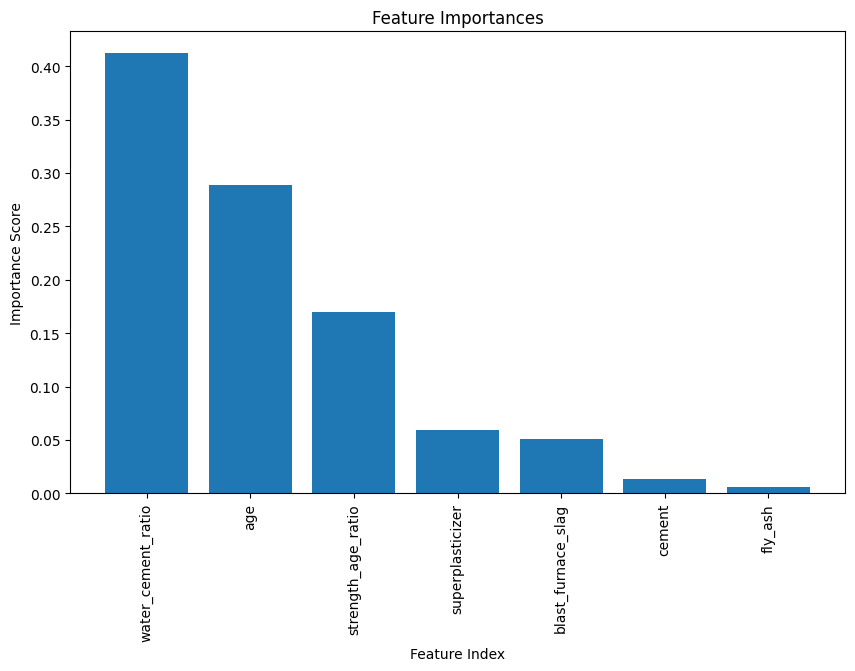

In [30]:

# Get feature importances
importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()


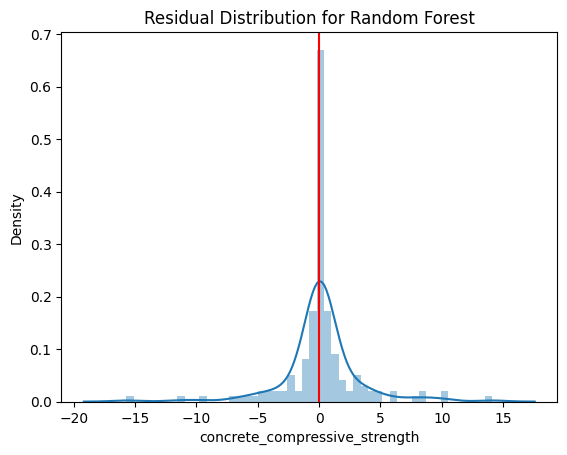

In [31]:
residuals = y_test - y_pred_test
sns.distplot(residuals)
plt.axvline(0,color = 'red')
plt.title('Residual Distribution for Random Forest')
plt.show()

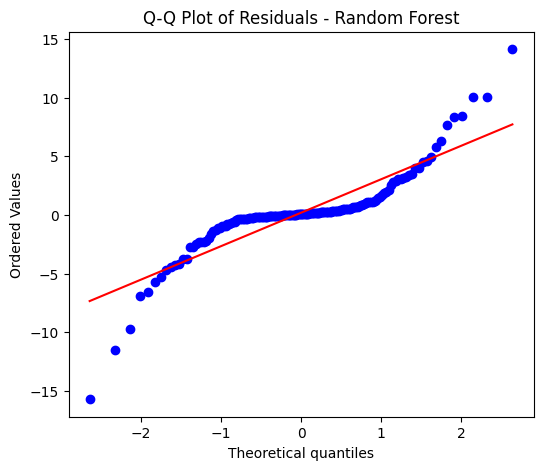

In [32]:
import scipy.stats as stats

# Q-Q Plot for Normality Check
plt.figure(figsize=(6,5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals - Random Forest")
plt.show()

In [33]:
y_pred_test.shape, residuals.shape

((165,), (165,))

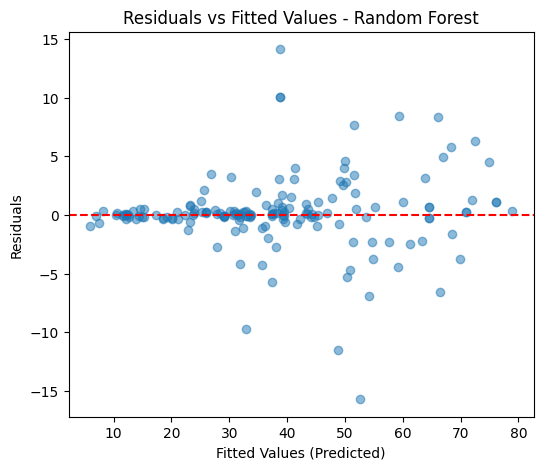

In [34]:
# Residuals vs. Fitted Plot
plt.figure(figsize=(6,5))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values - Random Forest")
plt.show()

# Artifical Neural Network Model training

In [35]:


# ANN Model
model_ann = keras.Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Prevents overfitting
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.3),
    # Dense(16, activation='relu'),
    # Dropout(0.2),
    Dense(1)  # Output Layer
])

# Compile the model
model_ann.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the Model
history = model_ann.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1649.6469 - mae: 36.2625 - val_loss: 1203.4313 - val_mae: 29.9895
Epoch 2/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 787.5009 - mae: 22.9982 - val_loss: 170.4703 - val_mae: 10.4065
Epoch 3/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 213.1496 - mae: 11.5776 - val_loss: 130.9749 - val_mae: 8.7979
Epoch 4/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 208.0865 - mae: 11.0986 - val_loss: 108.8363 - val_mae: 8.0259
Epoch 5/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 181.3646 - mae: 10.3372 - val_loss: 106.8592 - val_mae: 7.8952
Epoch 6/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 185.1751 - mae: 10.4054 - val_loss: 89.1844 - val_mae: 7.2653
Epoch 7/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 147.4144 - mae: 9.4222 - val_loss: 77.8729 - val_mae: 6.7187
Epoch 8/200
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 164.0083 - mae: 9.9297 - val_loss: 80.2472 - val_mae: 6.8788
Epoch 9/200
42/42 ━━━━━━━

In [36]:
model_ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,181 (133.52 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,788 (89.02 KB)

## Model Training Curves

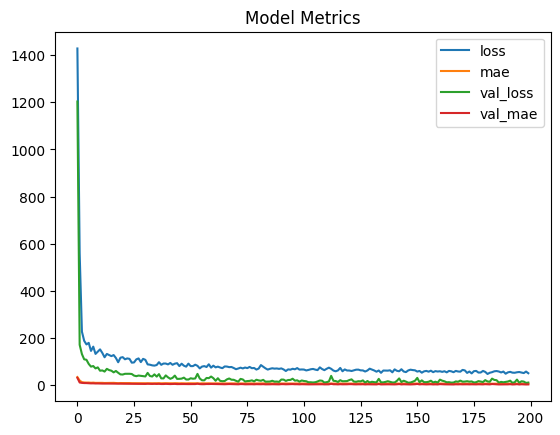

In [37]:
hist = model_ann.history.history
hist = pd.DataFrame(hist)
hist.plot()
plt.title('Model Metrics')
plt.show()

In [38]:
y_pred_train = model_ann.predict(X_train)
y_pred_test = model_ann.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


## ANN Model Evaluation

In [39]:
# Evaluate on Train Data
y_pred_train = model_ann.predict(X_train)
train_r2_score = r2_score(y_train, y_pred_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)

# Evaluate on Test Data
y_pred_test = model_ann.predict(X_test)
test_r2_score = r2_score(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)

# Print Evaluation Metrics
print('Evaluation for Artificial Neural Network:')
print('Train R2 Score  :', round(train_r2_score, 3))
print('Test R2 Score   :', round(test_r2_score, 3))
print('Train MAE       :', round(train_mae, 3))
print('Test MAE        :', round(test_mae, 3))
print('Train MSE       :', round(train_mse, 3))
print('Test MSE        :', round(test_mse, 3))
print('Train RMSE      :', round(train_rmse, 3))
print('Test RMSE       :', round(test_rmse, 3))


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Evaluation for Artificial Neural Network:
Train R2 Score  : 0.976
Test R2 Score   : 0.968
Train MAE       : 1.921
Test MAE        : 2.245
Train MSE       : 7.046
Test MSE        : 10.078
Train RMSE      : 2.654
Test RMSE       : 3.175


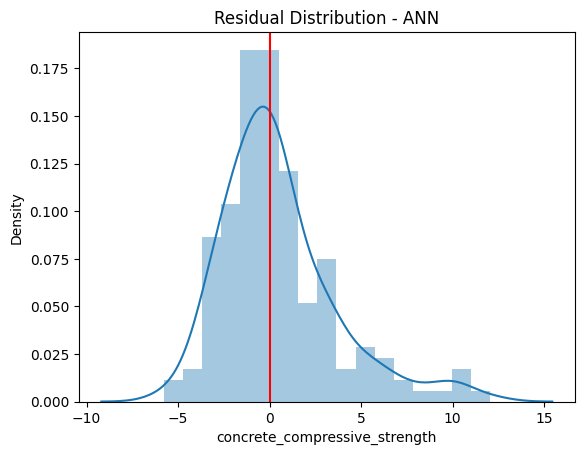

In [40]:
residuals = y_test - y_pred_test.flatten()
sns.distplot(residuals)
plt.axvline(0,color = 'red')
plt.title('Residual Distribution - ANN')
plt.show()

- Normally Distributed Residuals - The histogram and KDE plot show a bell-shaped curve, indicating that residuals are approximately normally distributed.
- Centered Around Zero - The red vertical line at zero suggests that the model has low bias, as the residuals are symmetrically distributed around zero.
- No Major Skewness - The distribution is balanced, meaning no major over-prediction or under-prediction trends.
- Low Residual Variability - Most residuals are within a narrow range, indicating good model performance with minimal errors.
- **Conclusion: The ANN model is well-fitted, showing low bias and normally distributed residuals, making it reliable for predictions. 🚀**

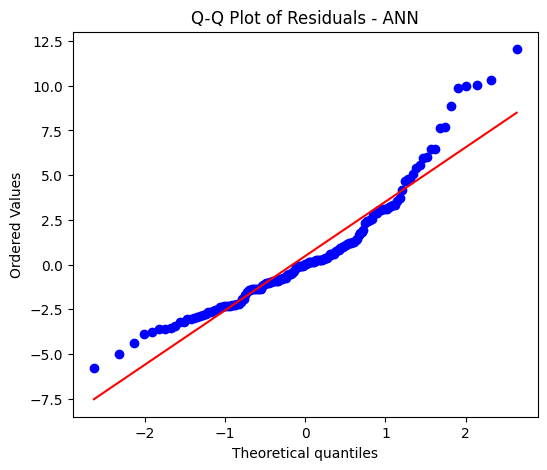

In [41]:

# Q-Q Plot for Normality Check
plt.figure(figsize=(6,5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals - ANN")
plt.show()


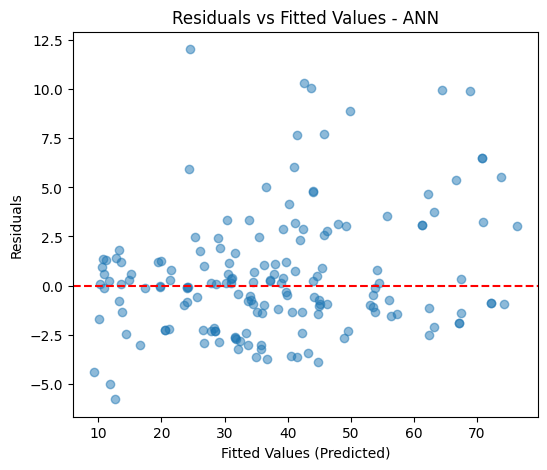

In [42]:
# Residuals vs. Fitted Plot
plt.figure(figsize=(6,5))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values - ANN")
plt.show()

- No Clear Pattern - Residuals are randomly scattered around the red dashed line (zero), suggesting that the model captures the relationship well and there is no major systematic error.
- Homoscedasticity (Constant Variance) - The spread of residuals appears relatively uniform across different predicted values, indicating that heteroscedasticity is not a major issue.
- Some Outliers - A few residuals are noticeably large, suggesting some instances where predictions deviate significantly from actual values.
- Good Model Fit - Since there is no strong trend, the ANN model appears to be making unbiased predictions.
- **Conclusion: The ANN model performs well with no major bias or heteroscedasticity issues, but further fine-tuning may help address the few large residuals. 🚀**

ExactExplainer explainer: 166it [00:14,  8.93it/s]


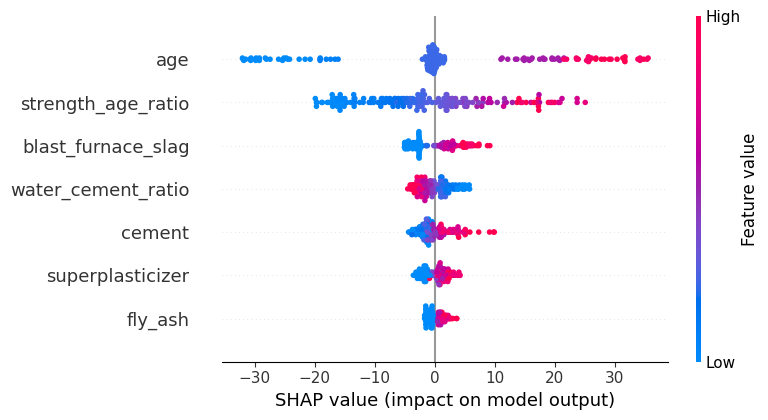

In [43]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(model_ann, X_train)
shap_values = explainer(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


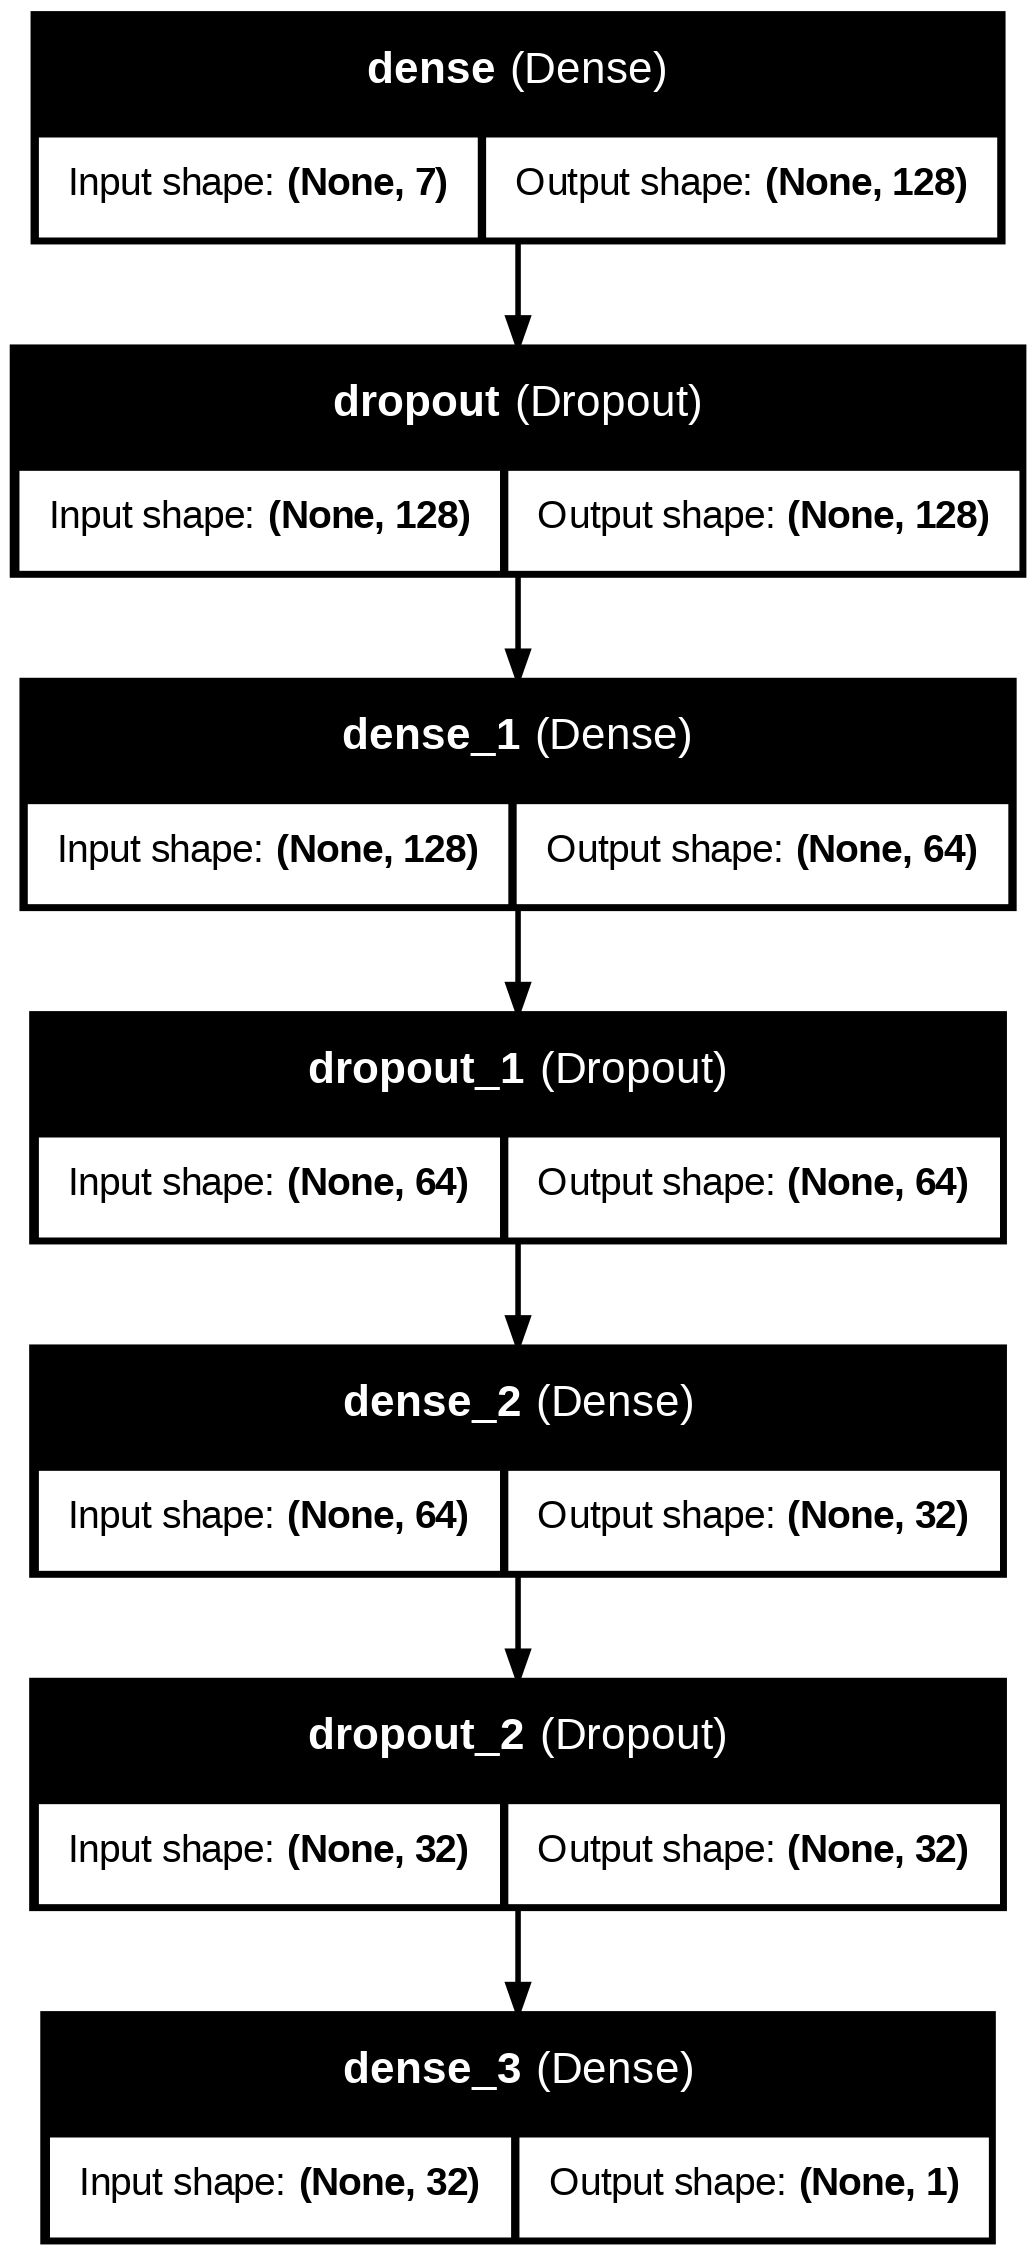

In [44]:
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin"

plot_model(model_ann, to_file="model_ann.png", show_shapes=True, show_layer_names=True)

In [45]:
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

def build_model(hp):
    model = Sequential()

    # Input Layer
    model.add(Dense(units=hp.Int('units_input', min_value=128, max_value=256, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))

    # Hidden Layers (variable number)
    for i in range(hp.Int('num_layers', 1, 4)):  # Choose 1 to 3 hidden layers
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    # Output Layer
    model.add(Dense(1))

    # Compile model
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='LOG')),
        loss='mse',
        metrics=['mae']
    )

    return model


In [53]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=30,  # Number of models to test
    executions_per_trial=2,  # Number of times to train each model
    directory='kerastuner_results',
    project_name='ann_regression_tuning2'
)

# Start tuning
tuner.search(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print best hyperparameters
print(f"""
Optimal number of layers: {best_hps.get('num_layers')}
Optimal neurons in input layer: {best_hps.get('units_input')}
Optimal learning rate: {best_hps.get('learning_rate')}
""")

best_hps.values

Trial 30 Complete [00h 01m 06s]
val_loss: 5.968364477157593

Best val_loss So Far: 4.311817646026611
Total elapsed time: 00h 33m 12s

Optimal number of layers: 1
Optimal neurons in input layer: 192
Optimal learning rate: 0.006429326855520711



{'units_input': 192,
 'num_layers': 1,
 'units_0': 32,
 'dropout_0': 0.30000000000000004,
 'learning_rate': 0.006429326855520711,
 'units_1': 32,
 'dropout_1': 0.4,
 'units_2': 64,
 'dropout_2': 0.4,
 'units_3': 32,
 'dropout_3': 0.30000000000000004}

In [59]:
# Get the best model and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), )


Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 1140.3872 - mae: 28.7515 - val_loss: 153.5228 - val_mae: 9.6051
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 177.0464 - mae: 10.5177 - val_loss: 83.9548 - val_mae: 7.0434
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 132.4118 - mae: 8.8269 - val_loss: 82.1858 - val_mae: 6.9521
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 122.6491 - mae: 8.4628 - val_loss: 74.3555 - val_mae: 6.4625
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 121.5968 - mae: 8.5082 - val_loss: 53.5355 - val_mae: 5.3705
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 123.4532 - mae: 8.2702 - val_loss: 61.3203 - val_mae: 5.7829
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 110.0974 - mae: 7.9444 - val_loss: 63.7772 - val_mae: 5.9503
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 104.6056 - mae: 7.6253 - val_loss: 41.9428 - val_mae: 5.0642
Epoch 9/100
42/42 ━━━━━━━━━━━━━

In [60]:
loss, mae = best_model.evaluate(X_train, y_train)
print(f"Best Model Performance Train - MSE: {loss}, MAE: {mae}")

val_loss, val_mae = best_model.evaluate(X_test, y_test)
print(f"Best Model Performance Test - MSE: {val_loss}, MAE: {val_mae}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0370 - mae: 2.3032 
Best Model Performance Train - MSE: 8.980831146240234, MAE: 2.2771213054656982
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.9785 - mae: 2.7672 
Best Model Performance Test - MSE: 11.58780288696289, MAE: 2.584590196609497


In [61]:
# Evaluate on Train Data
y_pred_train = best_model.predict(X_train)
train_r2_score = r2_score(y_train, y_pred_train)
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
train_rmse = np.sqrt(train_mse)

# Evaluate on Test Data
y_pred_test = best_model.predict(X_test)
test_r2_score = r2_score(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_rmse = np.sqrt(test_mse)

# Print Evaluation Metrics
print('Evaluation for Artificial Neural Network:')
print('Train R2 Score  :', round(train_r2_score, 3))
print('Test R2 Score   :', round(test_r2_score, 3))
print('Train MAE       :', round(train_mae, 3))
print('Test MAE        :', round(test_mae, 3))
print('Train MSE       :', round(train_mse, 3))
print('Test MSE        :', round(test_mse, 3))
print('Train RMSE      :', round(train_rmse, 3))
print('Test RMSE       :', round(test_rmse, 3))


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Evaluation for Artificial Neural Network:
Train R2 Score  : 0.969
Test R2 Score   : 0.963
Train MAE       : 2.277
Test MAE        : 2.585
Train MSE       : 8.981
Test MSE        : 11.588
Train RMSE      : 2.997
Test RMSE       : 3.404


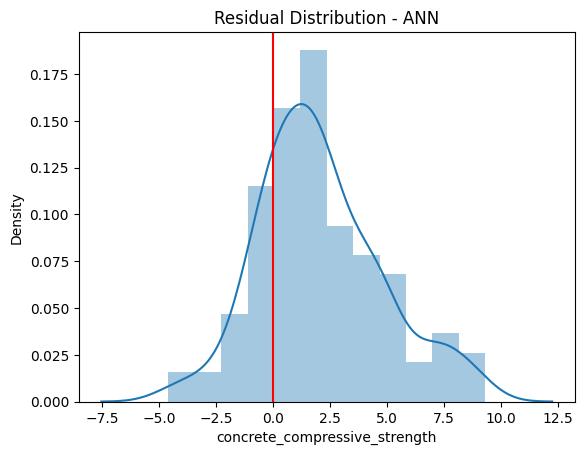

In [62]:
residuals = y_test - y_pred_test.flatten()
sns.distplot(residuals)
plt.axvline(0,color = 'red')
plt.title('Residual Distribution - ANN')
plt.show()

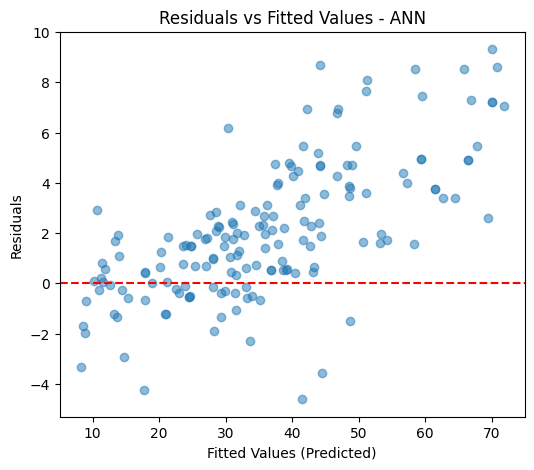

In [ ]:
# Residuals vs. Fitted Plot
plt.figure(figsize=(6,5))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values - ANN")
plt.show()

# Save Trained model and preprocessor

In [ ]:
import joblib

# Save only the fitted scaler
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as scaler.pkl")

# Save the trained model
best_model.save("final_model.keras")
print("Trained model saved as final_model.keras")

Scaler saved as scaler.pkl
Trained model saved as final_model.keras


In [1]:
!pip freeze > requirements.txt
